# Visualisation: 2021


In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
import re
import csv
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import json
import seaborn as sns
from heapq import nlargest
import operator
from collections import Counter

In [2]:
with open('json/data2021.json') as json_file:
    data_dict21 = json.load(json_file)

with open('json/names2021.json') as json_file:
    names_dict21 = json.load(json_file)
    
with open('json/data2020.json') as json_file:
    data_dict20 = json.load(json_file)

with open('json/data2020_Q2.json') as json_file:
    data_dict20Q2 = json.load(json_file)
    
with open('json/data2020_Q3.json') as json_file:
    data_dict20Q3 = json.load(json_file)
    
with open('json/data2020_Q4.json') as json_file:
    data_dict20Q4 = json.load(json_file)

with open('json/names2020.json') as json_file:
    names_dict20 = json.load(json_file)
    
with open('json/data2019.json') as json_file:
    data_dict19 = json.load(json_file)
                             
with open('json/names2019.json') as json_file:
    names_dict19 = json.load(json_file)
    
with open('json/data2018.json') as json_file:
    data_dict18 = json.load(json_file)
                             
with open('json/names2018.json') as json_file:
    names_dict18 = json.load(json_file)

In [3]:
df_21 = pd.DataFrame.from_dict(data_dict21,orient='index').stack().reset_index()
df_21.columns=['CIK','issuer','amount']

In [4]:
print(df_21)

              CIK                                       issuer    amount
0      0000950123                             10X GENOMICS INC  174263.0
1      0000950123                         1LIFE HEALTHCARE INC    8700.0
2      0000950123                           21VIANET GROUP INC  673656.0
3      0000950123                                       2U INC  432215.0
4      0000950123                                        3M CO  910759.0
...           ...                                          ...       ...
40602  0001213900  Monmouth Real Estate Investment Corporation   15000.0
40603  0001213900                      Natura &Co Holding S.A.  301479.0
40604  0001213900                                  Rambus Inc.  434200.0
40605  0001213900            Standex International Corporation  126351.0
40606  0001213900                                 Textron Inc.  131250.0

[40607 rows x 3 columns]


In [25]:
G = nx.from_pandas_edgelist(df_21, source='CIK', 
                            target = 'issuer', 
                            edge_attr='amount')

In [26]:
cik, issuer = bipartite.sets(G, df_21['CIK'])
#print("CIK:\n"+str(list(cik)))
#print("Issuer:\n"+str(list(issuer)))


## total visualisation 

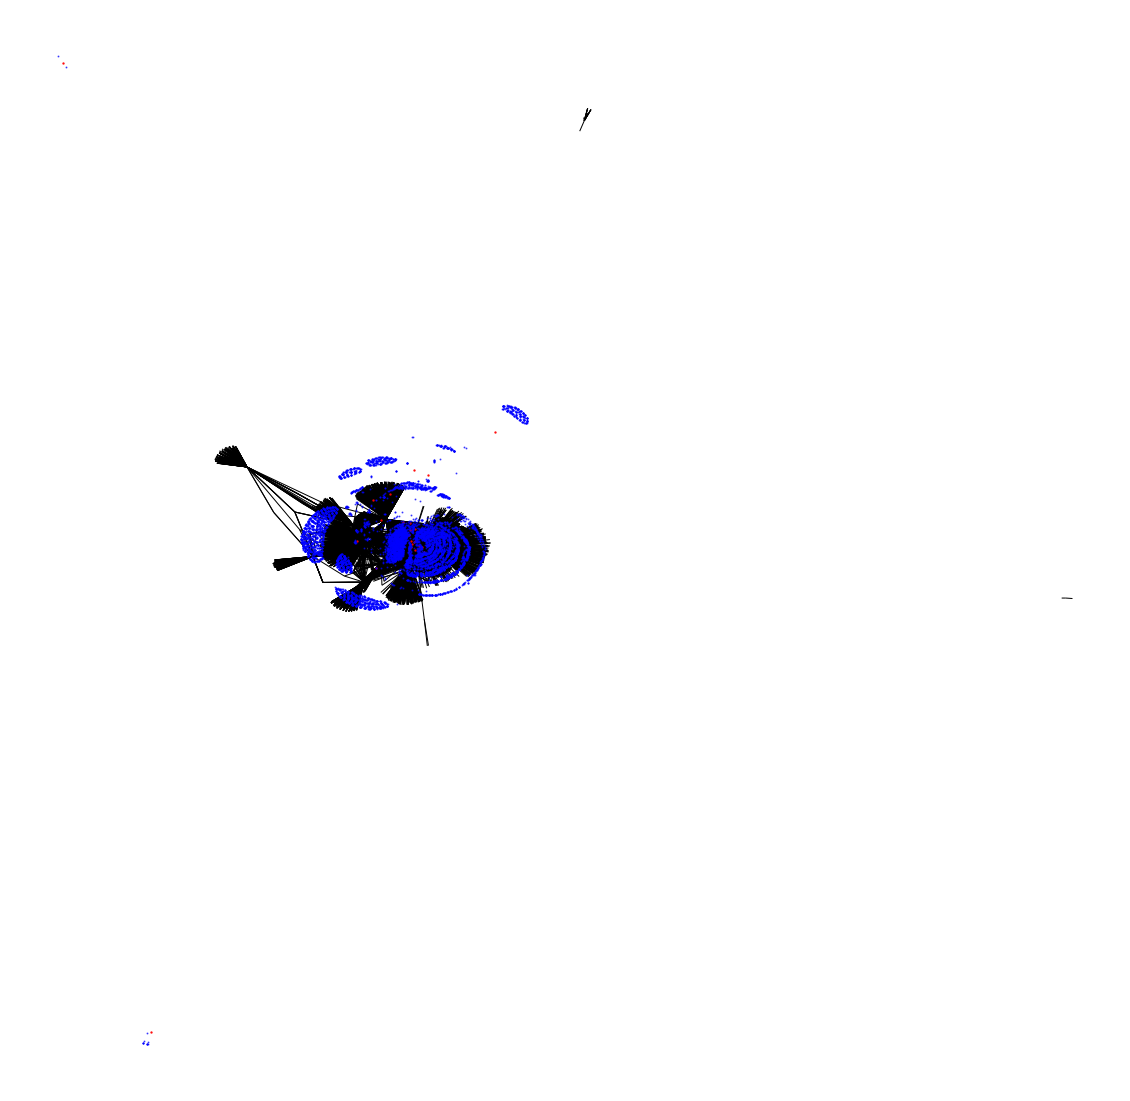

In [16]:
pos=nx.spring_layout(G) # positions for all nodes

plt.figure(figsize=(20,20)) 
plt.axis('off')
#nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=cik,
                       node_color='r',
                       node_size= 2,
                        alpha = 0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=issuer,
                       node_color='b',
                       node_size= 1,
                        alpha = 0.6)
# edges
nx.draw_networkx(G, node_size = 0, with_labels = False)

# Make visulisation with the most important nodes (more than 15 edges)

In [38]:
remove1 = [node for node,degree in dict(G.degree(issuer)).items() if (degree <=15)]


In [28]:
len(remove1)

9268

In [39]:
cik1, issuer1 = bipartite.sets(G, df_21['CIK'])
#print("CIK:\n"+str(list(cik1)))
#print("Issuer:\n"+str(list(issuer1)))

In [40]:
G.remove_nodes_from(remove1)

In [41]:
cikDegree1 = G.degree(cik1)
#print(cikDegree1)

In [42]:
issuerDegree1 = G.degree(issuer1)
#print(issuerDegree1)

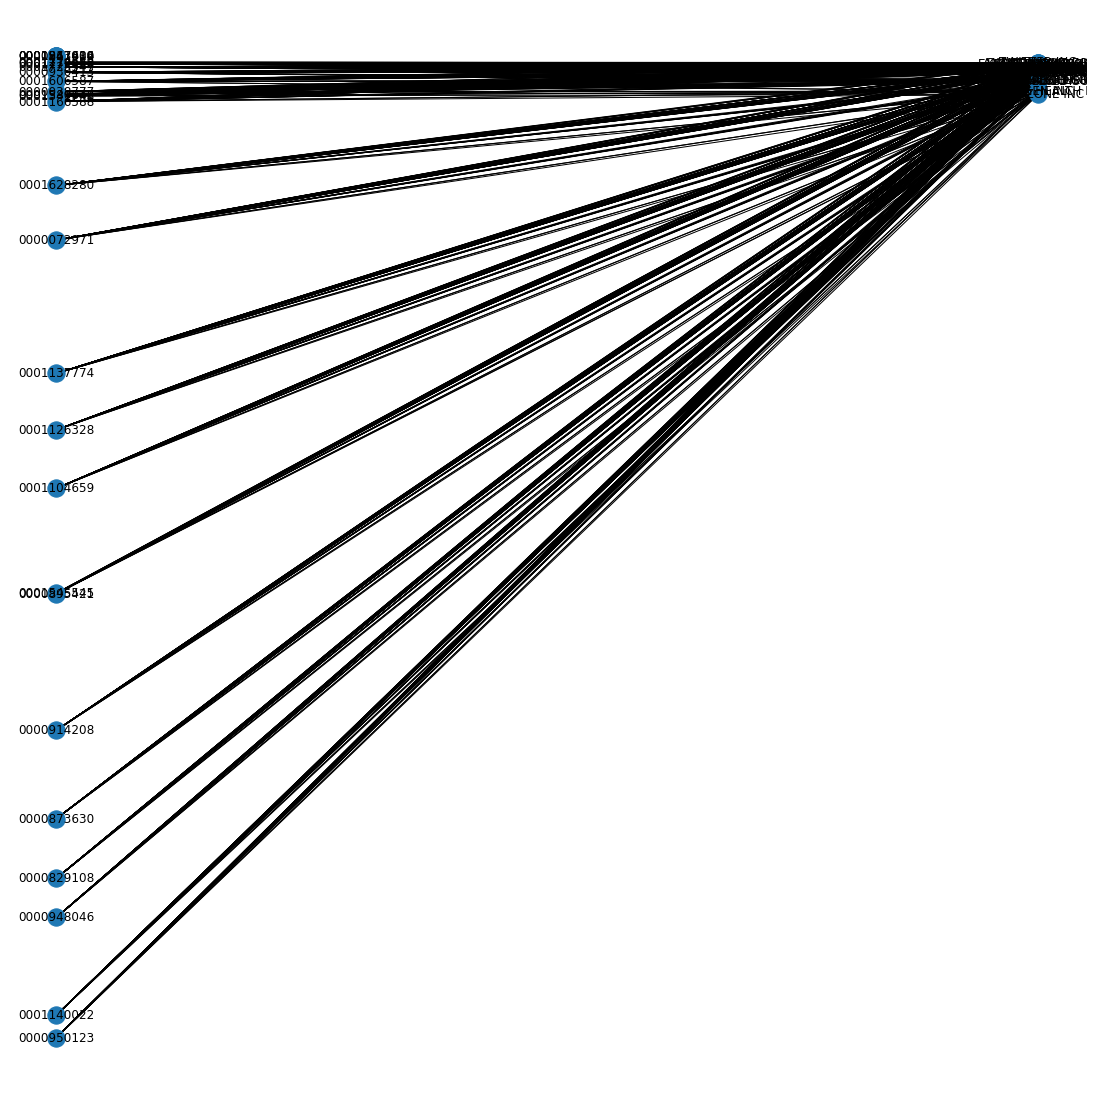

In [35]:
plt.figure(figsize=(15,15))
pos = {node:[0, i] for i,node in enumerate(df_21['CIK'])}
pos.update({node:[1, i] for i,node in enumerate(df_21['issuer'])})
nx.draw(G, pos, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(G, pos)

plt.show()

Remove the cik numbers with no edges

In [43]:
remove2 = [node for node,degree in dict(G.degree(cik)).items() if (degree ==0)]

In [44]:
G.remove_nodes_from(remove2)

In [45]:
len(G.nodes())

75

In [46]:
cik2, issuer2 = bipartite.sets(G, df_21['CIK'])
#print("CIK:\n"+str(list(cik2)))
#print("Issuer:\n"+str(list(issuer2)))

CIK:
['0001725547', '0001137774', '0001567619', '0000948046', '0001545545', '0000947484', '0000038777', '0000914208', '0001126328', '0001214659', '0001628280', '0001779453', '0000950123', '0000930413', '0001140022', '0001580642', '0001841616', '0001213900', '0001606587', '0001172036', '0001104659', '0001341748', '0001166588', '0000072971', '0000895421', '0000829108', '0000873630']
Issuer:
['XCEL ENERGY INC', 'JOHNSON & JOHNSON', 'GENERAL ELECTRIC CO', 'EVERSOURCE ENERGY', 'LOCKHEED MARTIN CORP', 'DISNEY WALT CO', 'CSX CORP', '3M CO', 'CITIGROUP INC', 'TWITTER INC', 'CONOCOPHILLIPS', 'UNITEDHEALTH GROUP INC', 'MCDONALDS CORP', 'STARBUCKS CORP', 'GILEAD SCIENCES INC', 'MEDTRONIC PLC', 'BIOGEN INC', 'TESLA INC', 'ALTRIA GROUP INC', 'QUALCOMM INC', 'FACEBOOK INC', 'PEPSICO INC', 'CARDINAL HEALTH INC', 'BLACKROCK INC', 'ROCKWELL AUTOMATION INC', 'NETFLIX INC', 'ALPHABET INC', 'INTEL CORP', 'VERIZON COMMUNICATIONS INC', 'EXXON MOBIL CORP', 'APPLE INC', 'AMAZON COM INC', 'CONSOLIDATED EDISON 

In [51]:
cikDegree2 = G.degree(cik2)
#print(cikDegree2)
cik3 = [n for n,value in cikDegree2]
print(cik3) #cik number with edges

['0001725547', '0001137774', '0000948046', '0001545545', '0000038777', '0000914208', '0001126328', '0001214659', '0001628280', '0001779453', '0000950123', '0000930413', '0001140022', '0001580642', '0001606587', '0001172036', '0001104659', '0001341748', '0001166588', '0000072971', '0000895421', '0000829108', '0000873630']


In [52]:
issuerDegree2 = G.degree(issuer2)
#print(issuerDegree2)
issuer3 = [n for n,value in issuerDegree2]
print(issuer3) #cik number with edges

['XCEL ENERGY INC', 'JOHNSON & JOHNSON', 'GENERAL ELECTRIC CO', 'EVERSOURCE ENERGY', 'LOCKHEED MARTIN CORP', 'DISNEY WALT CO', 'CSX CORP', '3M CO', 'CITIGROUP INC', 'TWITTER INC', 'CONOCOPHILLIPS', 'UNITEDHEALTH GROUP INC', 'MCDONALDS CORP', 'STARBUCKS CORP', 'GILEAD SCIENCES INC', 'MEDTRONIC PLC', 'BIOGEN INC', 'TESLA INC', 'ALTRIA GROUP INC', 'QUALCOMM INC', 'FACEBOOK INC', 'PEPSICO INC', 'CARDINAL HEALTH INC', 'BLACKROCK INC', 'ROCKWELL AUTOMATION INC', 'NETFLIX INC', 'ALPHABET INC', 'INTEL CORP', 'VERIZON COMMUNICATIONS INC', 'EXXON MOBIL CORP', 'APPLE INC', 'AMAZON COM INC', 'CONSOLIDATED EDISON INC', 'AMGEN INC', 'HOME DEPOT INC', 'CVS HEALTH CORP', 'ORACLE CORP', 'PHILLIPS 66', 'CATERPILLAR INC', 'WALMART INC', 'PFIZER INC', 'DOW INC', 'MICROSOFT CORP', 'ABBVIE INC', 'MORGAN STANLEY', 'TARGET CORP', 'BROADCOM INC', 'CORTEVA INC', 'LAM RESEARCH CORP', 'BOEING CO', 'NEXTERA ENERGY INC', 'AUTOZONE INC']


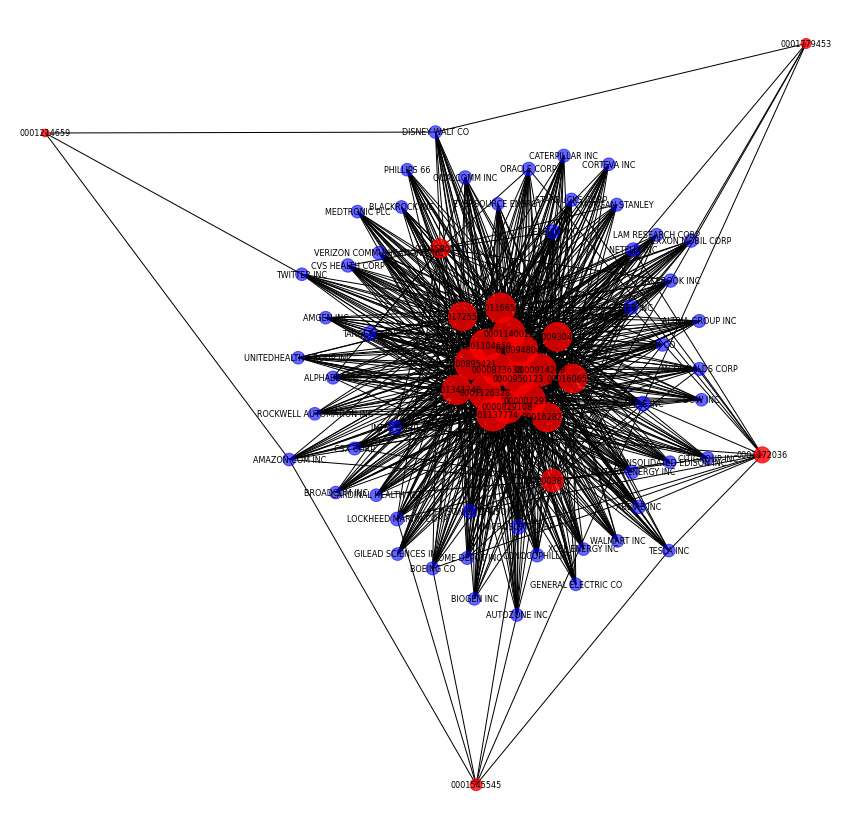

In [54]:
pos=nx.spring_layout(G) # positions for all nodes

plt.figure(2,figsize=(15,15)) 
plt.axis('off')
#nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=cik3,
                       node_color='r',
                       node_size= [v * 20 for v in dict(cikDegree2).values()],
                        alpha = 0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=issuer3,
                       node_color='b',
                       node_size= [v * 10 for v in dict(issuerDegree2).values()],
                        alpha = 0.6)
nx.draw_networkx(G,pos,width=1, alpha = 1, node_size= 0, font_size = 8)